In [2]:
import glob;import os;import matplotlib.image as mpimg;import matplotlib.pyplot as plt
import numpy as np;import pickle;import sys as s;import random as rd
import torch;import torch.nn as nn;import torch.optim as optim
from pandas_ods_reader import read_ods

In [3]:
def Get_Dataset_real():# Esse é o nome da função.
    sheet = "sheet_name"
    df = read_ods('data_without_low_data.ods', headers=True)
    sheets=df.keys()
    cells=[];    Y=[];    X=[]
    for i in sheets:
        cells.append(i)
    cells.remove('time')
    o=1
    for i in cells:
        o+=1
        y=np.array(df[i])
        y=y/max(y)
        x=np.linspace(0,len(y),len(y))
        Y.append(y)
        X.append(x)
    #Y=torch.as_tensor(Y)
    print(np.shape(Y))

    address = open("Y_train","wb");    pickle.dump(Y, address);    address.close()
    return Y
Y=Get_Dataset_real()

(44, 145)


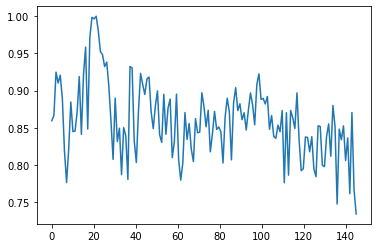

In [4]:
index=rd.randint(0,np.shape(Y)[0])
y=1*Y[index]
x=np.linspace(0,len(y),len(y))
plt.plot(x,y)
plt.show()

## Gera o dataset_1.0

O dataset é composto de $$part_1=[y_0,..,y_{d/2}]$$ with dimension $d$ and $$label_1=[0].$$ For the initial part of the graph. Now for the second part of the graph we have $$part_2=[y_{d/2},...,y_d]$$ and with $$label_2=[1].$$

In [5]:
''' Gera o dataset
        O dataset é composto de $part_1=[y_0,..,y_{d/2},0,0,...,0]$ with dimension $d$ and $label_1=[0]$ For the initial part of the graph.
        For the second part of the graph we have $part_2=[0,...,0,y_{d/2},...,y_d]$ and with $label_2=[1]$.
'''
Input=[]
Output=[]
for i in Y:
    Y1=i[0:int(np.shape(Y)[1]/2)]
    Input.append(Y1)
    Output.append(0)
    Y2=i[int(np.shape(Y)[1]/2):np.shape(Y)[1]-1]
    Input.append(Y2)
    Output.append(1)

Input=np.reshape(Input,(4,22,72))
Output=np.reshape(Output,(4,22,1))
Input=torch.as_tensor(Input)
Output=torch.as_tensor(Output)
address = open("Input_Train","wb");    pickle.dump(Input, address);    address.close()
address = open("Train_Labels","wb");    pickle.dump(Output, address);    address.close()
print(np.shape(Input))
print(np.shape(Output))

    

torch.Size([4, 22, 72])
torch.Size([4, 22, 1])


In [6]:
n_examples=np.shape(Input)[2]
print(n_examples)

72


In [7]:
#------------------DEFINE O MODELO----------------------------------------------
#-------------------------------------------------------------------------------
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_examples,720),
            nn.ReLU(),
            nn.Linear(720,1500),
            nn.ReLU(),
            nn.Linear(1500,2000),
            nn.ReLU(),
            #nn.Linear(2000,3000),
            #nn.ELU(),
            #nn.Linear(3000,1500),
            #nn.ELU(),
            nn.Linear(2000,500),
            nn.ReLU(),
            nn.Linear(500,50),
            nn.ReLU(),
            nn.Linear(50,1),
            #nn.ELU()
            #nn.Softmax()
        )
    def forward(self, x):
        encoded = self.encoder(x)
#        print(np.shape(encoded))
#        print(np.shape(aux))
        #decoded = self.decoder(encoded)
        return encoded

In [8]:
#------------------CHAMA O MODELO E INICIA CAMADAS DE PESOS ORTOGONAIS----------
#-------------------------------------------------------------------------------
model = Autoencoder()
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4,weight_decay = 1e-5)
#optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,weight_decay = 1e-5)#,momentum=0.5)

In [9]:
#-------------------------------------------------------------------------------
#------TREINO DA IA-------------------------------------------------------------
#-------------------------------------------------------------------------------
def treine(epochs):
    inp = pickle.load( open( "Input_Train", "rb" ) )
    out =  pickle.load( open( "Train_Labels", "rb" ) )
    n_batch=np.shape(inp)[0]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            O=inp[batch_idx]
            A=out[batch_idx]
            O=O.float()
            A=A.float()
            recon = model(O)
            loss=torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
treine(1300)
'''1300 épocas leva 16 min approx'''

Epoch:1,Loss:0.3009
Epoch:2,Loss:0.2736
Epoch:3,Loss:0.2719
Epoch:4,Loss:0.2571
Epoch:5,Loss:0.2576
Epoch:6,Loss:0.2584
Epoch:7,Loss:0.2586
Epoch:8,Loss:0.2567
Epoch:9,Loss:0.2567
Epoch:10,Loss:0.2579
Epoch:11,Loss:0.2571
Epoch:12,Loss:0.2569
Epoch:13,Loss:0.2575
Epoch:14,Loss:0.2574
Epoch:15,Loss:0.2572
Epoch:16,Loss:0.2577
Epoch:17,Loss:0.2577
Epoch:18,Loss:0.2579
Epoch:19,Loss:0.2581
Epoch:20,Loss:0.2583
Epoch:21,Loss:0.2584
Epoch:22,Loss:0.2587
Epoch:23,Loss:0.2589
Epoch:24,Loss:0.2590
Epoch:25,Loss:0.2592
Epoch:26,Loss:0.2594
Epoch:27,Loss:0.2595
Epoch:28,Loss:0.2598
Epoch:29,Loss:0.2598
Epoch:30,Loss:0.2590
Epoch:31,Loss:0.2575
Epoch:32,Loss:0.2554
Epoch:33,Loss:0.2536
Epoch:34,Loss:0.2515
Epoch:35,Loss:0.2488
Epoch:36,Loss:0.2465
Epoch:37,Loss:0.2442
Epoch:38,Loss:0.2419
Epoch:39,Loss:0.2400
Epoch:40,Loss:0.2380
Epoch:41,Loss:0.2341
Epoch:42,Loss:0.2285
Epoch:43,Loss:0.2260
Epoch:44,Loss:0.2246
Epoch:45,Loss:0.2236
Epoch:46,Loss:0.2225
Epoch:47,Loss:0.2195
Epoch:48,Loss:0.2101
E

'1300 épocas leva 16 min approx'

In [10]:
PATH_save='first_State_dataset_10.pt'
torch.save(model.state_dict(), PATH_save)
#PATH_load='Colab_Estado_Detect_Anomaly_AE(32x32).pt'
#model.load_state_dict(torch.load(PATH_load))

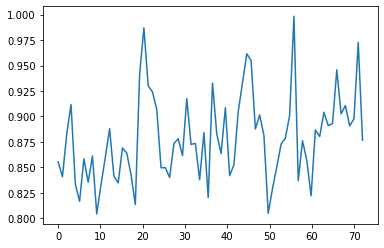

resposta =  tensor([-0.0309], grad_fn=<SelectBackward0>)
label =  tensor([0.])


In [33]:
def random_predict():
    inp = pickle.load( open( "Input_Train", "rb" ) )
    a=np.shape(inp)[0]-1
    b=np.shape(inp)[1]-1
    a_idx=rd.randint(0,a)
    b_idx=rd.randint(0,b)
    out =  pickle.load( open( "Train_Labels", "rb" ) )
    O=inp[a_idx]
    y=1*O[b_idx]
    x=np.linspace(0,len(y),len(y))
    plt.plot(x,y)
    plt.show()  
    A=out[a_idx]
    O=O.float()
    A=A.float()
    resposta = model(O)
    print('resposta = ',resposta[b_idx])
    print('label = ',A[b_idx])
random_predict()

* Label = 0 (primeira parte do grafico)
* Label = 1 (segunda parte do grafico)
* Se a resposta for 0 quer dizer que a rede acha que o gráfico que foi apresentado é um gráfico do inicio.
* Se a resposta for 1, a rede acha que é da segunda parte.


## Gera o dataset_2.0

__Como a rede nao estava fácil de treinar pensei em mudar o dataset, entretanto a primeira ideia de Dataset foi possível de ser utilizada..__

The dataset 2.0 could be $$part_1=[y_0,..,y_{d/2},0,0,...,0]$$ with dimension $d$ and $$label_1=[0].$$ For the initial part of the graph. Now for the second part of the graph we have $$part_2=[0,...,0,y_{d/2},...,y_d]$$ and with $$label_2=[1].$$